# Relatório de Análise VIII 

## identificando e removendo outliers

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure',figsize = (14,6))

In [4]:
df = pd.read_csv('../dados/aluguel_residencial.csv', sep=';')

In [5]:
df.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
6,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
7,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento
8,Quitinete,Copacabana,1,0,0,27,1800.0,501.0,0.0,66.67,Apartamento
9,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0,53.50,Apartamento


<AxesSubplot:>

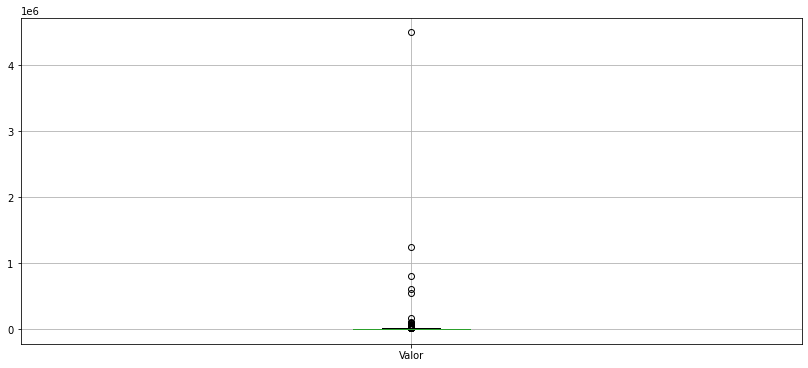

In [6]:
df.boxplot(['Valor'])

In [7]:
df[df['Valor'] >= 500000 ]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
7595,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
10596,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Apartamento
12611,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
13791,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
15459,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [8]:
valor = df['Valor']

In [9]:
valor

0        1700.0
1        7000.0
2         800.0
3         800.0
4        1300.0
          ...  
21726     900.0
21727     800.0
21728    1800.0
21729    1400.0
21730    3000.0
Name: Valor, Length: 21731, dtype: float64

In [10]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limiteInferior = Q1 - 1.5 * IIQ
limiteSuperior = Q3 + 1.5 * IIQ

In [11]:
selecao = (valor >= limiteInferior) & (valor <= limiteSuperior)
df_new = df[selecao]

In [12]:
df_new

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
21726,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,12.86,Apartamento
21727,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,29.63,Apartamento
21728,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,23.08,Apartamento
21729,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,29.17,Apartamento


<AxesSubplot:>

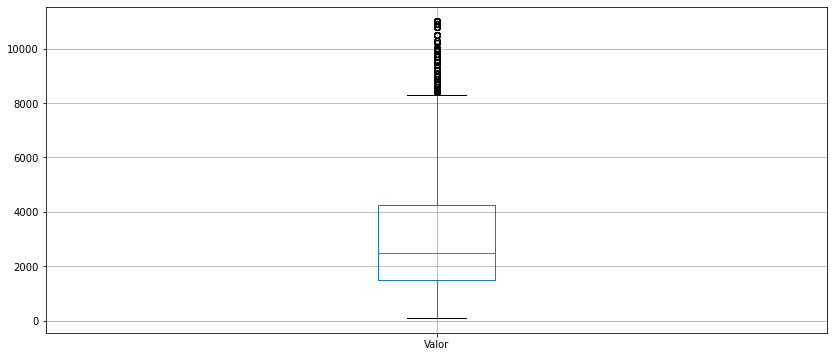

In [13]:
df_new.boxplot(['Valor'])

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

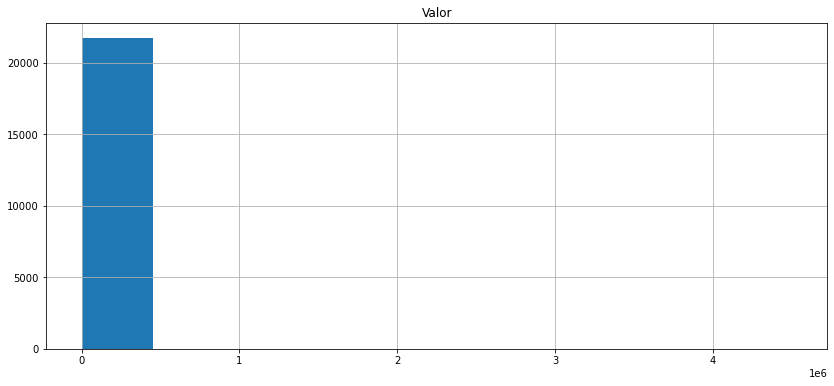

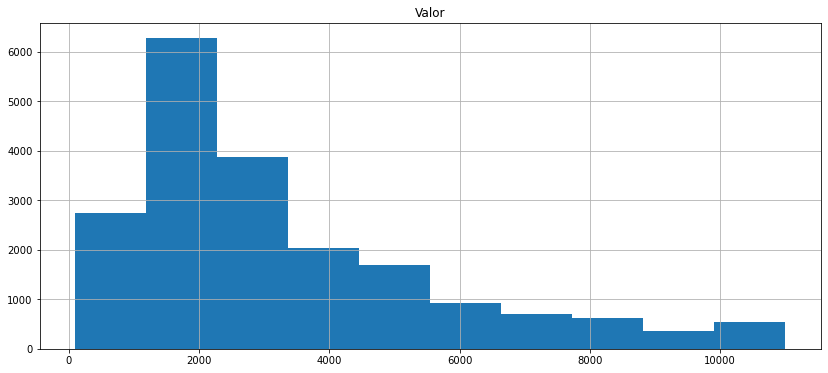

In [14]:
df.hist(['Valor'])
df_new.hist(['Valor'])

## Atividades
### Nosso objetivo neste exercício é obter o conjunto de estatísticas representado na figura acima. 
### Para isso, baixe aqui o arquivo aluguel_amostra.csv, e utilize-o para realizar suas análises utilizando 
### como variável alvo o Valor m2 (valor do metro quadrado). Lembrando que Q1 representa o 1º quartil e Q3 o 3º quartil, 
### selecione o item com a resposta correta (considere somente duas casas decimais):


In [15]:
df_atividade = pd.read_csv('../dados/aluguel_amostra.csv', sep=';')

In [16]:
df_atividade

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Recreio dos Bandeirantes,3,2,1,320,3200.0,1319.0,0.0,10.00,Apartamento
1,Apartamento,Maracanã,2,0,0,59,800.0,725.0,47.0,13.56,Apartamento
2,Apartamento,Leblon,3,2,1,147,7500.0,1000.0,381.0,51.02,Apartamento
3,Apartamento,São Conrado,3,3,3,270,14999.0,2800.0,1200.0,55.55,Apartamento
4,Apartamento,Tijuca,2,1,0,65,1200.0,640.0,97.0,18.46,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
9995,Apartamento,Copacabana,3,1,2,160,15500.0,1600.0,435.0,96.88,Apartamento
9996,Apartamento,Copacabana,4,0,0,190,6000.0,1000.0,0.0,31.58,Apartamento
9997,Apartamento,Barra da Tijuca,2,1,1,70,2800.0,750.0,160.0,40.00,Apartamento
9998,Apartamento,Tijuca,1,0,0,50,1700.0,360.0,20.0,34.00,Apartamento


<AxesSubplot:>

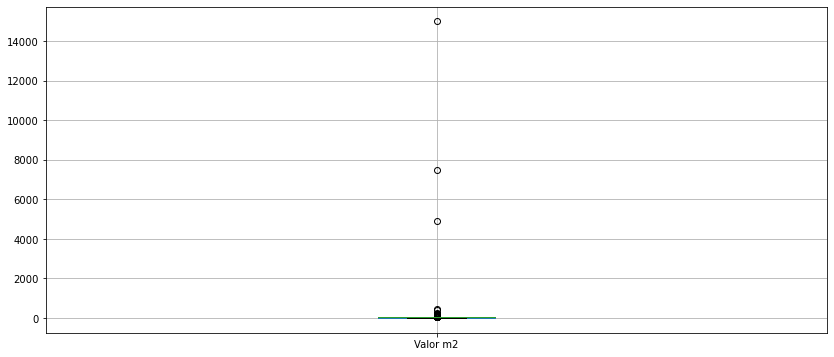

In [17]:
df_atividade.boxplot(['Valor m2'])

In [18]:
df_atividade[df_atividade['Valor m2'] >= 2000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
535,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
726,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
7493,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [19]:
valorm2 = df_atividade['Valor m2']

In [20]:
valorm2

0       10.00
1       13.56
2       51.02
3       55.55
4       18.46
        ...  
9995    96.88
9996    31.58
9997    40.00
9998    34.00
9999     8.33
Name: Valor m2, Length: 10000, dtype: float64

In [21]:
Q1 = valorm2.quantile(.25)
Q3 = valorm2.quantile(.75)
IIQ = (Q3 - Q1).round(2)
limiteInferior = (Q1 - 1.5 * IIQ).round(2)
limiteSuperior = (Q3 + 1.5 * IIQ).round(2)

In [22]:
print(Q1)
print(Q3)
print(IIQ)
print(limiteInferior)
print(limiteSuperior)

21.25
42.31
21.06
-10.34
73.9


In [23]:
selecao = (valorm2 >= limiteInferior) & (valorm2 <= limiteSuperior)

In [24]:
df_atividade_new = df_atividade[selecao]

In [25]:
df_atividade

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Recreio dos Bandeirantes,3,2,1,320,3200.0,1319.0,0.0,10.00,Apartamento
1,Apartamento,Maracanã,2,0,0,59,800.0,725.0,47.0,13.56,Apartamento
2,Apartamento,Leblon,3,2,1,147,7500.0,1000.0,381.0,51.02,Apartamento
3,Apartamento,São Conrado,3,3,3,270,14999.0,2800.0,1200.0,55.55,Apartamento
4,Apartamento,Tijuca,2,1,0,65,1200.0,640.0,97.0,18.46,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
9995,Apartamento,Copacabana,3,1,2,160,15500.0,1600.0,435.0,96.88,Apartamento
9996,Apartamento,Copacabana,4,0,0,190,6000.0,1000.0,0.0,31.58,Apartamento
9997,Apartamento,Barra da Tijuca,2,1,1,70,2800.0,750.0,160.0,40.00,Apartamento
9998,Apartamento,Tijuca,1,0,0,50,1700.0,360.0,20.0,34.00,Apartamento


In [26]:
df_atividade_new

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Recreio dos Bandeirantes,3,2,1,320,3200.0,1319.0,0.0,10.00,Apartamento
1,Apartamento,Maracanã,2,0,0,59,800.0,725.0,47.0,13.56,Apartamento
2,Apartamento,Leblon,3,2,1,147,7500.0,1000.0,381.0,51.02,Apartamento
3,Apartamento,São Conrado,3,3,3,270,14999.0,2800.0,1200.0,55.55,Apartamento
4,Apartamento,Tijuca,2,1,0,65,1200.0,640.0,97.0,18.46,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
9994,Apartamento,Leblon,2,1,2,150,8000.0,1160.0,500.0,53.33,Apartamento
9996,Apartamento,Copacabana,4,0,0,190,6000.0,1000.0,0.0,31.58,Apartamento
9997,Apartamento,Barra da Tijuca,2,1,1,70,2800.0,750.0,160.0,40.00,Apartamento
9998,Apartamento,Tijuca,1,0,0,50,1700.0,360.0,20.0,34.00,Apartamento


<AxesSubplot:>

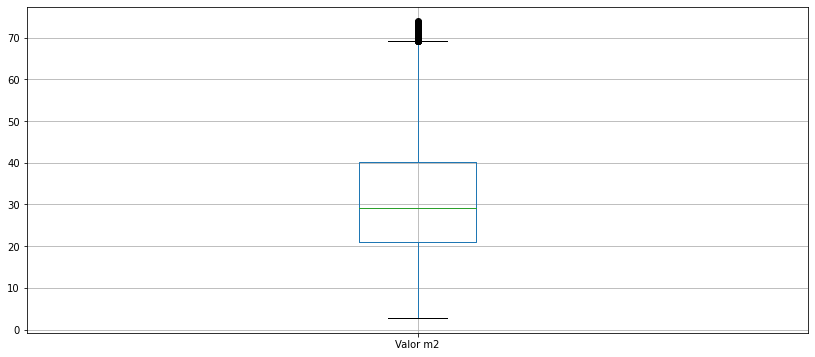

In [27]:
df_atividade_new.boxplot(['Valor m2'])

In [28]:
df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
21726,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,12.86,Apartamento
21727,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,29.63,Apartamento
21728,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,23.08,Apartamento
21729,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,29.17,Apartamento


# Removendo por grupo 

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

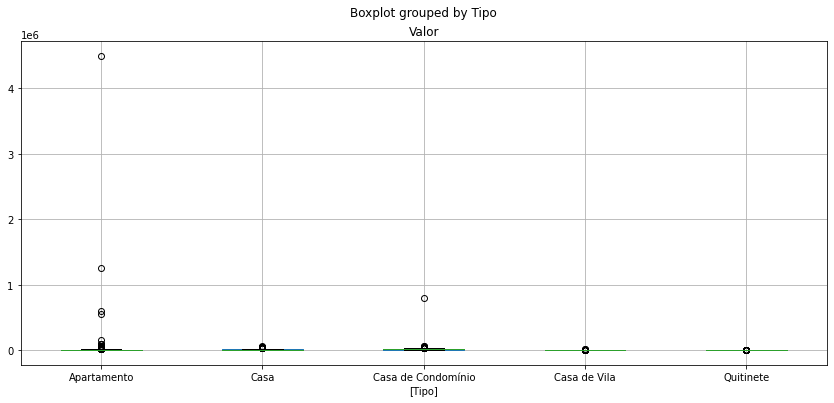

In [29]:
df.boxplot(['Valor'], by = ['Tipo'])

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

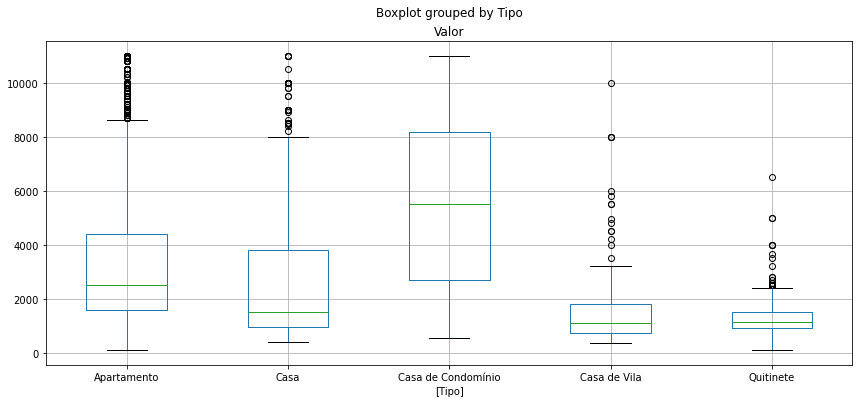

In [31]:
df_new.boxplot(['Valor'], by = ['Tipo'])

In [39]:
grupo_tipo = df.groupby('Tipo')['Valor']

In [37]:
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [40]:
grupo_tipo.groups

{'Apartamento': [2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 72, 73, 74, 76, 77, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90, 91, 92, 94, 95, 96, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, ...], 'Casa': [1, 19, 51, 54, 93, 97, 141, 157, 177, 235, 247, 250, 261, 283, 307, 313, 331, 336, 354, 375, 382, 396, 421, 431, 471, 472, 478, 508, 539, 540, 564, 568, 569, 614, 617, 626, 631, 632, 656, 672, 696, 717, 720, 756, 767, 776, 852, 869, 933, 978, 1025, 1032, 1112, 1117, 1119, 1151, 1172, 1243, 1250, 1310, 1328, 1343, 1364, 1404, 1418, 1422, 1431, 1436, 1463, 1466, 1479, 1577, 1595, 1647, 1653, 1657, 1662, 1675, 1700, 1708, 1753, 1800, 1825, 1865, 1895, 1923, 1932, 1950, 2009, 2029, 2046, 2065, 2091, 2097, 2098, 2123, 2160, 2191, 2194, 2201, ...], 'Casa de 

In [41]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = (Q3 - Q1).round(2)
limiteInferior = (Q1 - 1.5 * IIQ).round(2)
limiteSuperior = (Q3 + 1.5 * IIQ).round(2)

In [42]:
Q1

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    4250.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [43]:
Q3

Tipo
Apartamento            5000.0
Casa                   9800.0
Casa de Condomínio    15000.0
Casa de Vila           1800.0
Quitinete              1500.0
Name: Valor, dtype: float64

In [44]:
IIQ

Tipo
Apartamento            3300.0
Casa                   8700.0
Casa de Condomínio    10750.0
Casa de Vila           1050.0
Quitinete               600.0
Name: Valor, dtype: float64

In [45]:
limiteInferior

Tipo
Apartamento           -3250.0
Casa                 -11950.0
Casa de Condomínio   -11875.0
Casa de Vila           -825.0
Quitinete                 0.0
Name: Valor, dtype: float64

In [47]:
limiteSuperior

Tipo
Apartamento            9950.0
Casa                  22850.0
Casa de Condomínio    31125.0
Casa de Vila           3375.0
Quitinete              2400.0
Name: Valor, dtype: float64

In [50]:
limiteSuperior['Casa']

22850.0

In [52]:
df_new_2 = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = df['Tipo'] == tipo
    eh_dentroLimite = (df.Valor >= limiteInferior[tipo]) & (df.Valor <= limiteSuperior[tipo])
    selecao = eh_tipo & eh_dentroLimite
    df_selecao = df[selecao]
    df_new_2 = pd.concat([df_new_2, df_selecao])
    

In [53]:
df_new_2

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
6,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
21592,Quitinete,Glória,1,0,0,10,400.0,107.0,10.0,40.00,Apartamento
21633,Quitinete,Flamengo,1,0,0,23,900.0,605.0,0.0,39.13,Apartamento
21653,Quitinete,Centro,1,0,0,24,1100.0,323.0,0.0,45.83,Apartamento
21720,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0,68.18,Apartamento


<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

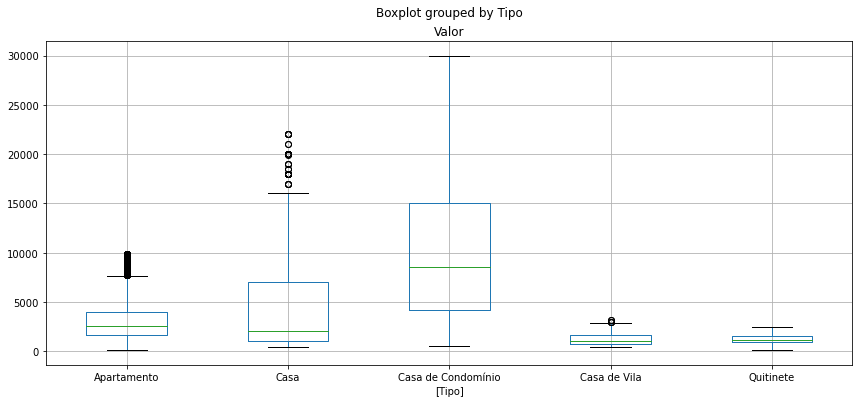

In [54]:
df_new_2.boxplot(['Valor'], by = ['Tipo'])

In [55]:
df_new_2.to_csv('../dados/aluguel_residencial_sem_outliers.csv', sep = ';', index = False)